In [1]:
import requests

## signup

In [20]:
q = requests.post("http://localhost:4500/captcha",json={"type":"signup"})

In [21]:
x = q.json()
captcha_id = x["message"]['captcha_id']
content = x["message"]['content']

In [22]:
content

'iVBORw0KGgoAAAANSUhEUgAAAIwAAAAoCAYAAAAsTRLGAAAEjUlEQVR4nO2az0tVQRTHvzdq0a7ARRjhD8RNuSlsY+qiX5IILkTaVbQJWtTClYL+AQq6FgwMKrIWurKSB4ItBLGglKgoKDMXrhLBhci0GG/31/w4c99998drPjDce2fOOXPevd83M3fecxhjDCEcx3HCdRYLADgiwZCdrbD+OxwAKEc0pE6ssKqGVARDxQor/+RKMFSssLLj340vmmgoWGElT1ULhooVFh0rGAOssHyCAaxokqKahWUFkyFFFJYVTAHIk7COmDpsbAAnTgANDcDycgUyskRgRNLIJaJcVcdLS0BHhzyYHZ/yT7mjldEI4xfL9jZw/nw4GV5EvHvntftLqWSasiVLjKckgI8kNTXA6io/d4tLWDRzc8CFC+JYV67IReZy+7YnsP7+OBlbkiIiGNWQ5YpCZiESDwDMznrn8/NykX36FI3pOMD0tHf94kWwf9WoZolS7lpHeKtVQcMPh9K930dm79qE28O+a2tAS4t3LfNrbwfevhX31dgIfPsW7Yd8K285wHRxF2zlrGOMpyTGgNFRf+deef9e7yvj4MCL57K4GPU9d46fP3umHllkYgGA79/FvrrbeOoM0AYAjwHALr4CUF7jOjr8k0uw+Pnwgdc1N6vjXb7M7c6e5dc7O+J4wVdJXurrvbqeHq/+1y+5TzgutS8A7B7A0Cu3/fpV3pYHMhFMMAG1aHQPQ2ZH8Yvbn6nfpUu8re3QkCIuXf9jY2qbShFXF4oFrn4dI7N48wa4fj1oo/ORxab4UWNT/FSxAm2OAwdMa6vKK27eSRB3HRPrtfrmTbdTcfu1a8D4OD9//pwfe3vVPmF2d/mxtZUfnzyR27a38+Pnz/q4T5/yHO7eBY4f53UfP3rtujdBAPgDgGuFG716pe7z4kV1++/f6vbCoBrStra8YbdUirZ3dsqnF1Xkq1eTm5bCfaoKJZ5bd+C

In [23]:
from IPython.display import HTML


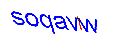

In [24]:
HTML(f"""
<img src="data:image/png;base64,{content}">""")

In [25]:
q = requests.post("http://localhost:4500/auth/signup",
                  json={"username":"hsz",
                        "password":"hsz",
                        "main_email":"hsz1273327@gmail.com",
                        "captcha_id":captcha_id,
                        "captcha_code":"soqavw"
                       }
                 )

In [26]:
q.json()

{'result': True}

In [47]:
q = requests.post("http://localhost:4500/auth/signup/ajax/username",
                  json={"username":"hsz"}
                 )

In [48]:
q.json()

{'message': '用户已存在', 'result': False}

In [49]:
q = requests.post("http://localhost:4500/auth/signup/ajax/main_email",
                  json={"main_email":"hsz@123.com"}
                 )

In [50]:
q.json()

{'message': 'email可用', 'result': True}

# auth

## /

In [51]:
q = requests.post("http://localhost:4500/auth",json={"username":"admin","password":"admin"})

In [52]:
admin_token = q.json()["message"]
admin_token

'eyJfaWQiOiJmNzhmYTU5Ny1jMTQwLTRjNmYtOGE2NC0xYjMzMmZmNmQwOWMiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHU-FQ.CyyySxDe7Holb5MuJ7Q32J5I-hw'

In [60]:
q = requests.post("http://localhost:4500/auth",json={"username":"hsz","password":"hsz"})

In [61]:
hsz_token = q.json()["message"]
hsz_token

'eyJfaWQiOiJjMDA0MWZmNC00ZjZmLTQzOTMtYjhjNC0wNGYyZGM4OTc4OWQiLCJyb2xlcyI6W119.DHU-Fg.PFtQj-OvWJOsSGr0HIHk3MJw220'

# api-role

## rolelist

### get with service_name

In [62]:
q = requests.get("http://localhost:4500/api/role",params={"service_name":"auth-center"},
                 headers={
                     "Authorization":admin_token})

In [63]:
q.json()

{'message': True}

### get 

In [64]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":admin_token})

In [65]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

### post

字段错误

In [66]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"name":"abc"}]},
                 headers={
                     "Authorization":admin_token})

In [67]:
q.json()

{'error': '\'"name" is not a recognized field.\'', 'message': '数据库错误'}

正确

In [68]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"service_name":"abc"}]},
                 headers={
                     "Authorization":admin_token})

In [69]:
q.json()

{'result': True}

In [70]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":admin_token})

In [71]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'},
   {'servicename': 'abc'}]}}

### delete

In [72]:
q = requests.delete("http://localhost:4500/api/role",
                  json={"service_name":"abc"},
                 headers={
                     "Authorization":admin_token})

In [73]:
q.json()

{'result': True}

In [74]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":admin_token})

In [75]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

# api-user

### get

In [76]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":admin_token})

In [77]:
q.json()

{'userlist': [{'_id': 'c0041ff4-4f6f-4393-b8c4-04f2dc89789d',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'},
  {'_id': 'f78fa597-c140-4c6f-8a64-1b332ff6d09c',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'}]}

### post

In [78]:
q = requests.post("http://localhost:4500/api/user",
                  json={'users':[
                      {"username":"a",
                       "password":"a",
                        "main_email":"a@gmail.com"}
                  ]},
                 headers={
                     "Authorization":admin_token})

In [79]:
q.json()

{'result': True}

In [83]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":admin_token})

In [84]:
userlist = q.json()['userlist']

{'userlist': [{'_id': '3ba95916-3241-423f-9b85-38b8206af64e',
   'main_email': 'a@gmail.com',
   'roles': [],
   'username': 'a'},
  {'_id': 'c0041ff4-4f6f-4393-b8c4-04f2dc89789d',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'},
  {'_id': 'f78fa597-c140-4c6f-8a64-1b332ff6d09c',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'}]}

In [90]:
admin = [i for i in userlist if i["username"]=="admin"][0]

In [91]:
hsz = [i for i in userlist if i["username"]=="hsz"][0]

In [92]:
a = [i for i in userlist if i["username"]=="a"][0]

### delete

In [93]:
q = requests.delete("http://localhost:4500/api/user",
                  json={'users':[a["_id"]]},
                 headers={
                     "Authorization":admin_token})

In [94]:
q.json()

{'result': True}

## api-user_role


### get

admin查看hsz

In [95]:
q = requests.get(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                 headers={
                     "Authorization":admin_token})

In [96]:
q.json()

{'roles': [], 'username': 'hsz'}

admin查看admin

In [97]:
q = requests.get(f"http://localhost:4500/api/user/role/{admin.get('_id')}",
                 headers={
                     "Authorization":admin_token})

In [98]:
q.json()

{'roles': ['auth-center', 'msg_reverse_indexing'], 'username': 'admin'}

hsz查看hsz

In [99]:
q = requests.get(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                 headers={
                     "Authorization":hsz_token})

In [100]:
q.json()

{'roles': [], 'username': 'hsz'}

hsz查看admin

In [101]:
q = requests.get(f"http://localhost:4500/api/user/role/{admin.get('_id')}",
                 headers={
                     "Authorization":hsz_token})

In [102]:
q.status_code

401

In [103]:
q.json()

{'message': '没有权限查看'}

### post

hsz为hsz添加权限

In [105]:
q = requests.post(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":hsz_token})

In [106]:
q.json()

{'message': '没有权限查看'}

admin为hsz添加权限

In [107]:
q = requests.post(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":admin_token})

In [108]:
q.json()

{'result': True}

### delete

hsz删除hsz的权限

In [109]:
q = requests.delete(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":hsz_token})

In [110]:
q.json()

{'message': '没有权限删除权限'}

admin删除hsz权限

In [111]:
q = requests.delete(f"http://localhost:4500/api/user/role/{hsz.get('_id')}",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":admin_token})

In [112]:
q.json()

{'result': True}

## api-user/main_email

### get

In [ ]:
q = requests.get("http://localhost:4500/api/user/role/61179587-d2a1-43f3-8626-63c469c24e8b",
                 headers={
                     "Authorization":"eyJfaWQiOiJmODMwZTg3ZS0wMGRiLTQ2NTYtYmM3MS00OTE4MjNkNzlkZWEiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHQuJA.oJzNr7ZZR81lfrvHNtxYR4UaFH4"})